<h2> VERY SIMPLE Feature Engineering and Finding the Best Prediction Model for  
    <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview"> 
        House Prices: Advanced Regression Techniques </a>  data set </h2>
        
<p> This Notebook was using: </p>
<p> Notebook 6.0.3, Python 3.7.7, scikit-learn 0.23.1., numpy 1.18.1, pandas 1.0.3 </p>

<p><h4> This very simple approach resulted in root mean logarithmic error of 0.1257 </p></h4>


Firstly, function read_data is defined. This function will: 
<p> 1) Read dataset </p>
<p> 2) Mapp nan-values which are not missing at random but they mean that the house does not have that feature </p>
(based on data description available with the data set) </p>
<p> 3) Separate features into: </p>
<p> categorical and continuous. </p>
<p> 4) Impute nan values depending on feature category. </p>
<p> KNNImputer is used for continuous features, while for nominal features SimpleImputer is used
<p> 5) Do log transform for continuous features  </p>


In [1]:
'''
Define a function read_data that will 
1) Read dataset
2) Mapp nan-values which are not missing at random 
3) Separate features into: categorical and continuous. 
4) Impute nan values depending on feature category. 
KNNImputer is used for continuous features and SimpleImputer for categorical features.
5) Do log transform for continuous features  
'''

def read_data():
    
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.impute import SimpleImputer, KNNImputer

    
    #------------ READ DATA -----------------
    Data_all_train = pd.read_csv("train.csv")
    Data_all_test = pd.read_csv("test.csv")
    
    df_Data_test = Data_all_test.iloc[:, 1:]
    df_Data_train = Data_all_train.iloc[:,1:-1]
    y = Data_all_train.iloc[:, -1].values
    
    train_location = df_Data_train.shape[0]
    
    #--- join test and tran set for presprocessing --------
    df_Data = pd.concat([df_Data_train, df_Data_test], axis=0)
    df_Data = df_Data.reset_index()

  
    # ------- MAPING NAN VALUES WITH THEIR MEANING  -----------------------------
    

    maping_function = { np.nan: 'Not_Having'}
    df_Data['Alley'] = df_Data['Alley'].replace(maping_function)
    df_Data['GarageType'] = df_Data['GarageType'].replace(maping_function)
    df_Data['Fence'] = df_Data['Fence'].replace(maping_function)
    df_Data['MiscFeature'] = df_Data['MiscFeature'].replace(maping_function)
    
    
    
#     -------------------------------------------------------------------------------------------
#   
#                       DIVIDE FEATURES INTO NOMINAL AND CONTINOUS     
# 
#    -------------------------------------------------------------------------------------------

 
    #--------------- NOMINAL FEATURES --------------------------------------------
    nominal_feat = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
                    'Heating', 'CentralAir', 'Electrical', 'BsmtFinType1', 'BsmtFinType2',
                    'Functional', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature',
                    'Condition1', 'Condition2',
                    'MoSold', 'YrSold', 
                    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                    'GarageCars', 'PoolQC', 'SaleType','SaleCondition',
                    "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath", 
                    'Fireplaces', 'FireplaceQu', 'HeatingQC', 'OverallQual', 'OverallCond', 'ExterCond', 'ExterQual',
                    'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
                    'GarageFinish','BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                    'BsmtExposure']     
                        
                    
    
    #--------------- CONTINOUS FEATURES --------------------------------------------
    
    continous_feat = ['LotFrontage', 'LotArea', 'MasVnrArea',
                      'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                      'GrLivArea', 'LowQualFinSF', 'GarageYrBlt', 
                      'WoodDeckSF', "GrLivArea", "TotalBsmtSF", 
                      "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch",
                      'YearBuilt', 'YearRemodAdd', 'GarageArea']
       
#     -------------------------------------------------------------------------------------------
#   
#                                 FILL THE MISSING VALUES     
# 
#    -------------------------------------------------------------------------------------------
    
    
   
    # ------- Simple Imuter for NOMINAL FEATURES ----------------------
    imr = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
    Nominal = imr.fit_transform(df_Data[nominal_feat]) 
    
    # ------- ONE HOT ENCODE NOMINAL FEATURES ------------------    
    ohe = OneHotEncoder(drop= 'first')
    Nominal = ohe.fit_transform(Nominal).toarray()
    
    
        
    # ---------KNN IMPUTER FOR MISSING Continous FEATURES ---------------------              
    #Impute Random NaNs with KNN
    imputer_knn = KNNImputer(n_neighbors = 5) 
    Continous = imputer_knn.fit_transform(df_Data[continous_feat]) 
    
    
    # ----- TRANSFORM CONTINOUS FEATURES -----------          
    Continous = np.log(Continous + 1)
          
    
    # --------------- Combine Continous, Ordinal and Nominal Features ---------------------
    Clean_Set = pd.concat([pd.DataFrame(Continous), pd.DataFrame(Nominal)], axis=1)
    X = Clean_Set[0:train_location].values
    X_test = Clean_Set[train_location:].values

    
    return X, y, X_test

# Building a prediction model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
X, y, X_test =  read_data()
print('Number of features', X.shape[1])
print('Number of samples', X.shape[0])

X_train, X_cross, y_train, y_cross = train_test_split(X, y, test_size = 0.3, random_state = 5)
print('Number of samples in train set', X_train.shape[0])
print('Number of samples in validation set', X_cross.shape[0])

Number of features 321
Number of samples 1460
Number of samples in train set 1022
Number of samples in validation set 438


<Figure size 432x288 with 0 Axes>

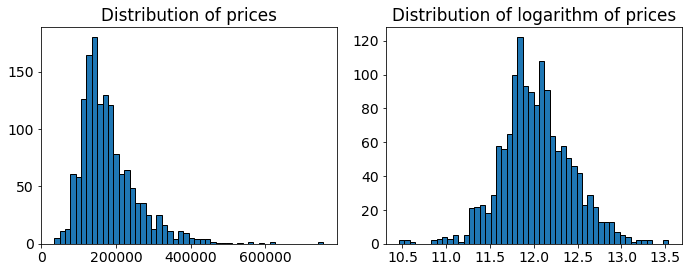

In [4]:
plt.figure();
plt.figure(figsize=(10,4));
plt.rcParams.update({'font.size': 14})
plt.subplot(121)
plt.hist(y, 50, edgecolor = 'k');
plt.title('Distribution of prices');
plt.subplot(122)
plt.hist(np.log(y), 50, edgecolor = 'k');
plt.title('Distribution of logarithm of prices');
plt.tight_layout();

The distribution of the prices is not Gaussian-like and therefore it will be easier for a model to predict logarithm of the house prices.

In [5]:
# Final score is calculated as root mean logarithmic error
def Score(model_prediction):
    Score = np.sqrt(np.mean((np.log(model_prediction) - np.log(y_cross))**2))
    return Score

Let's check Gradiend Boosting Regression and Ridge Linear Regression performance. 
The parameters of these models are chosen based on the validation set results.

# Gradiend Boosting Regression and Ridge Linear Regression

In [6]:
# ---- Ridge Regression 
from sklearn.linear_model import Ridge
clf = Ridge(alpha = 5).fit(X_train, np.log(y_train))
y_pred_Ridge_log = clf.predict(X_cross)
y_pred_Ridge = np.exp(y_pred_Ridge_log)

print ('Ridge regression score on the test set: ', Score(y_pred_Ridge))

Ridge regression score on the test set:  0.13374691353711793


In [7]:
# ---- Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators= X.shape[1]*4, learning_rate = 0.09, subsample= 0.8,
                                max_depth = 4, random_state=0, loss='ls').fit(X_train, np.log(y_train))
y_pred_Boost_log = est.predict(X_cross)
y_pred_Boost = np.exp(y_pred_Boost_log)

print ('Gradient boosting score on the test set: ', Score(y_pred_Boost))

Gradient boosting score on the test set:  0.1351897257745455


Read the file containing the results from the test set. This file was made public on Kaggle.

Let's see how the output of both models and why is combined model better than just one individual model.

<Figure size 432x288 with 0 Axes>

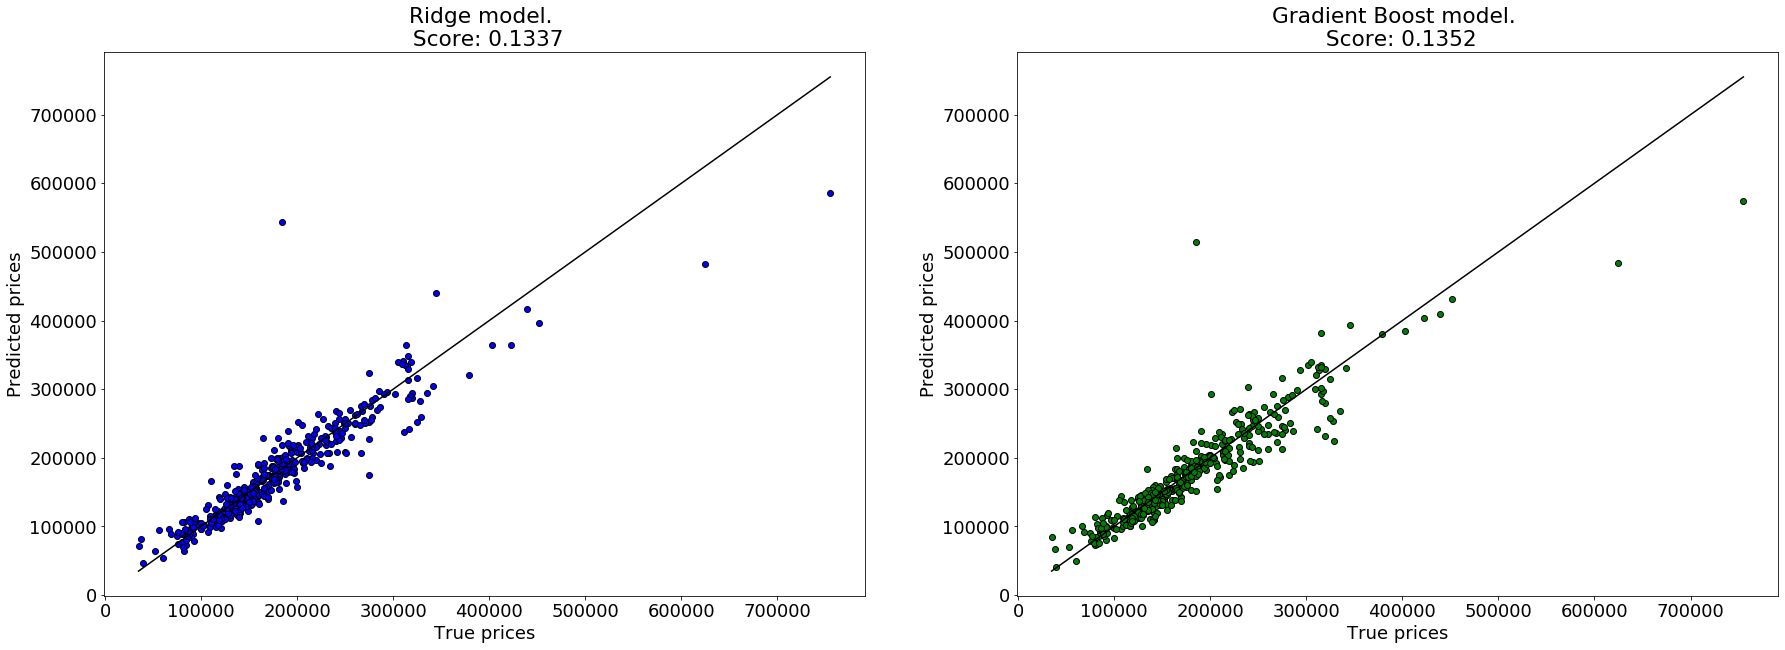

In [8]:
fig = plt.figure();
plt.figure(figsize=(30,10));
plt.rcParams.update({'font.size': 18})
plt.subplot(121);
plt.scatter(y_cross, y_pred_Ridge, color = 'b', edgecolor = 'k');
plt.plot([min(y_cross), max(y_cross)], [min(y_cross), max(y_cross)], color = 'k');
plt.title('Ridge model. \n Score: '+str(np.around(Score(y_pred_Ridge),4)));
plt.xlabel('True prices');
plt.ylabel('Predicted prices');
plt.subplot(122);
plt.scatter(y_cross, y_pred_Boost, color = 'g', edgecolor = 'k');
plt.plot([min(y_cross), max(y_cross)], [min(y_cross), max(y_cross)], color = 'k');
plt.title('Gradient Boost model. \n Score: '+str(np.around(Score(y_pred_Boost),4)));
plt.xlabel('True prices');
plt.ylabel('Predicted prices');
fig.tight_layout();

Downside of the both models is underestimate of the high prices.

# Support Vector Regression nad Random Forest

In [9]:
from sklearn.svm import SVR
sv_model = SVR(kernel='rbf',gamma='auto', C = 3, epsilon = 0.05).fit(X_train, np.log(y_train))
y_pred_SVR_log = sv_model.predict(X_cross)
y_pred_SVR = np.exp(y_pred_SVR_log)

In [10]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 200, random_state = 0, 
                               min_samples_split = 4, max_features= 0.6, n_jobs=-1).fit(X_train, np.log(y_train))
y_pred_RF_log = forest.predict(X_cross)
y_pred_RF = np.exp(y_pred_RF_log)

<Figure size 432x288 with 0 Axes>

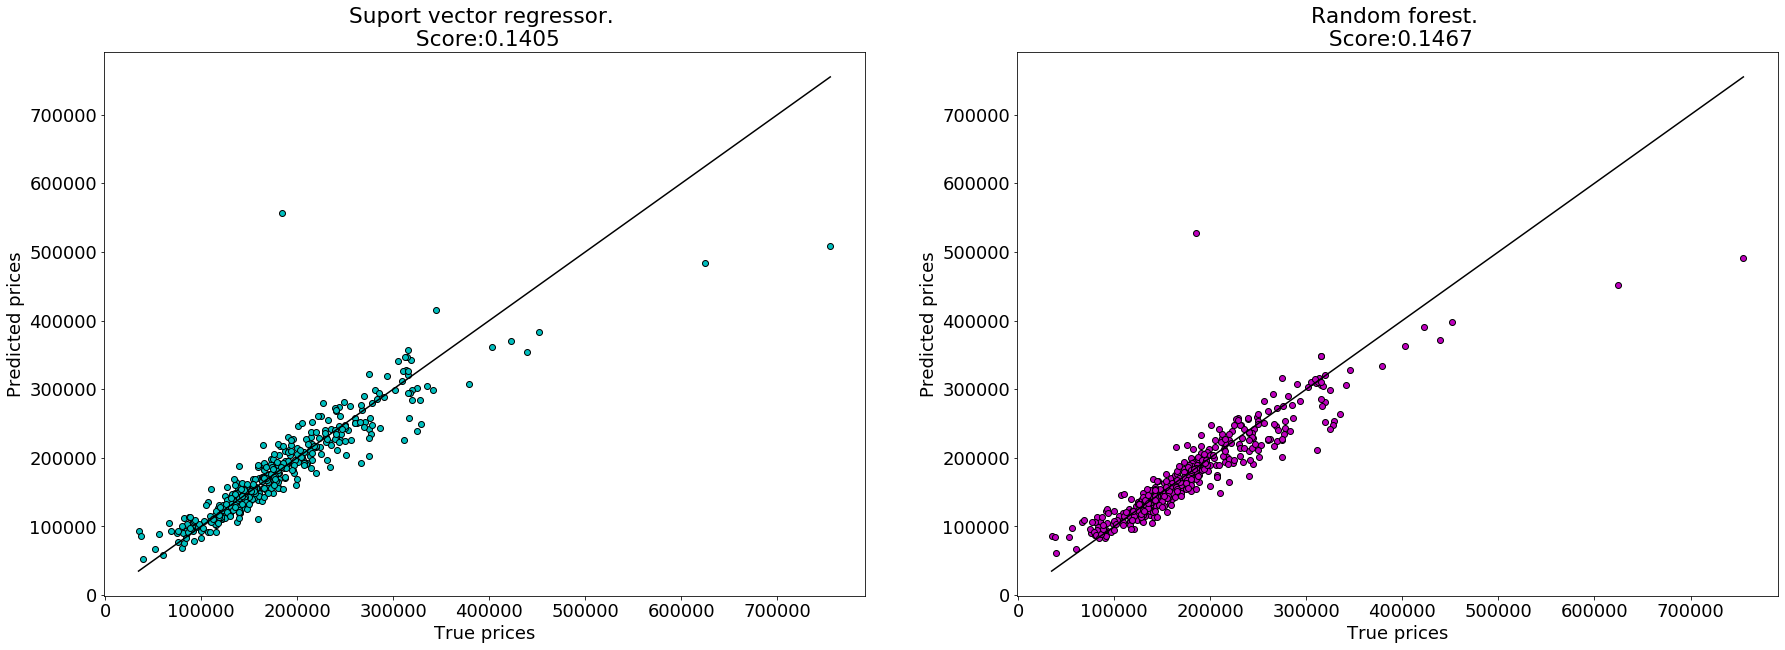

In [11]:
fig = plt.figure();
plt.figure(figsize=(30,10));
plt.rcParams.update({'font.size': 18})
plt.subplot(121);
plt.scatter(y_cross, y_pred_SVR, color = 'c', edgecolor = 'k');
plt.plot([min(y_cross), max(y_cross)], [min(y_cross), max(y_cross)], color = 'k');
plt.title('Suport vector regressor. \n Score:' +str(np.around(Score(y_pred_SVR),4)));
plt.xlabel('True prices');
plt.ylabel('Predicted prices');
plt.subplot(122);
plt.scatter(y_cross, y_pred_RF, color = 'm', edgecolor = 'k');
plt.plot([min(y_cross), max(y_cross)], [min(y_cross), max(y_cross)], color = 'k');
plt.title('Random forest. \n Score:' +str(np.around(Score(y_pred_RF),4)));
plt.xlabel('True prices');
plt.ylabel('Predicted prices');
fig.tight_layout();

Now let's make a combined model taking into account 3 best performing models, namely: Ridge, GBR, SVR

In [12]:
all_scores = []
best_score = 0.2

for a in np.arange(0.0, 1, 0.05):
    rest = 1 - a
    for b in np.arange(0.0, rest, 0.05):
        c = rest - b
        y_pred = np.exp(a*y_pred_Boost_log + b*y_pred_Ridge_log + c*y_pred_SVR_log)
        if Score(y_pred) < best_score:
            combination = dict(a = np.around(a,2), b = np.around(b,2), c = np.around(c,2))
            best_score = Score(y_pred)
            
print('Boost fraction:', combination['a'])
print('Ridge fraction:', combination['b'])
print('SVR fraction:', combination['c'])

Boost fraction: 0.45
Ridge fraction: 0.5
SVR fraction: 0.05


In [13]:
y_3models = combination['a']*y_pred_Boost_log + combination['b']*y_pred_Ridge_log + combination['c'] * y_pred_SVR_log
print('Final Score of 3 models : ', Score(np.exp(y_3models)))

Final Score of 3 models :  0.1274701040430899


# Training and Validation on the full Test Set

In [14]:
# ---- Ridge Regression 
clf = Ridge(alpha = 6).fit(X, np.log(y))
y_pred_Ridge_log = clf.predict(X_test)


# ---- Gradient Boosting
est = GradientBoostingRegressor(n_estimators= X.shape[1]*4, learning_rate = 0.09, subsample= 0.8,
                                max_depth = 4, random_state=0, loss='ls').fit(X, np.log(y))
y_pred_Boost_log = est.predict(X_test)


from sklearn.svm import SVR
sv_model = SVR(kernel='rbf',gamma='auto', C = 3, epsilon = 0.05).fit(X, np.log(y))
y_pred_SVR_log = sv_model.predict(X_test)

# --- Combined model
y_3models = combination['a']*y_pred_Boost_log + combination['b']*y_pred_Ridge_log + combination['c'] * y_pred_SVR_log

Now read the results of the test set. These results were dowloaded from the Kaggle Notebook: Perfect Score for Evaluation Purposes.

In [15]:
y_test = pd.read_csv('true_results.csv')
y_test = y_test.iloc[:,1].values

In [16]:
print('Final Score of 3 models on the True results: ', np.sqrt(np.mean((y_3models - np.log(y_test))**2)))

Final Score of 3 models on the True results:  0.12573593612355657
